In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
print("Train Data Shape:", train_df.shape) # it shows how many rows and columns are there 

Train Data Shape: (614, 13)


In [4]:
train_df.head() # gives the first 5 rows of the csv file 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# Exploratory  Data Analysis E.D.A

In [6]:
train_df.info() # checking the structure of the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
# checking for missing values 
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# Value counts of Loan_Status
train_df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

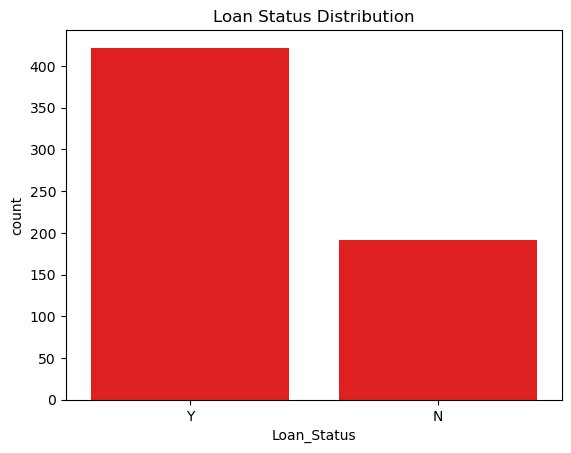

In [9]:
# Plot target distribution
import matplotlib.pyplot as plt
import seaborn as sns 
sns.countplot(data=train_df, x='Loan_Status', color='red')
plt.title("Loan Status Distribution")
plt.show()

In [10]:
train_df.describe() # summary statictics

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
# Categorical features 

In [11]:
# List of categorical features
categorical_cols = train_df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols.tolist())

Categorical Columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [12]:
# Frequency of values in categorical columns
for col in categorical_cols:
    print(f"\nValue counts for {col}:\n", train_df[col].value_counts())


Value counts for Loan_ID:
 Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64

Value counts for Gender:
 Gender
Male      489
Female    112
Name: count, dtype: int64

Value counts for Married:
 Married
Yes    398
No     213
Name: count, dtype: int64

Value counts for Dependents:
 Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

Value counts for Education:
 Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

Value counts for Self_Employed:
 Self_Employed
No     500
Yes     82
Name: count, dtype: int64

Value counts for Property_Area:
 Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

Value counts for Loan_Status:
 Loan_Status
Y    422
N    192
Name: count, dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_7696\1453196011.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:darkblue'` for the same effect.

  sns.countplot(data=train_df, x='Gender', hue='Loan_Status',color='darkblue')


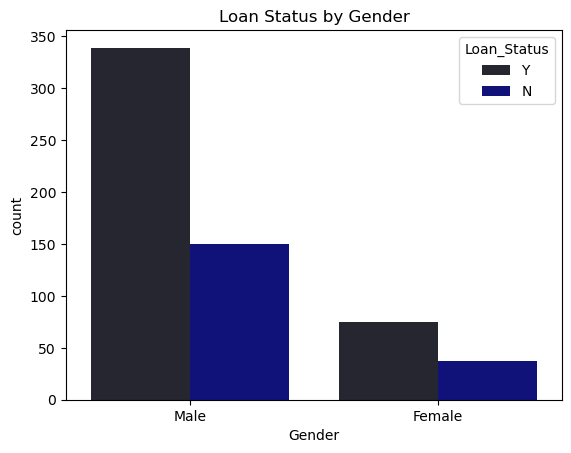

In [13]:
#...loan_Status and Gender  Visualization
sns.countplot(data=train_df, x='Gender', hue='Loan_Status',color='darkblue')
plt.title("Loan Status by Gender")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_7696\1645392393.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:orange'` for the same effect.

  sns.countplot(data=train_df, x='Education', hue='Loan_Status',color='orange')


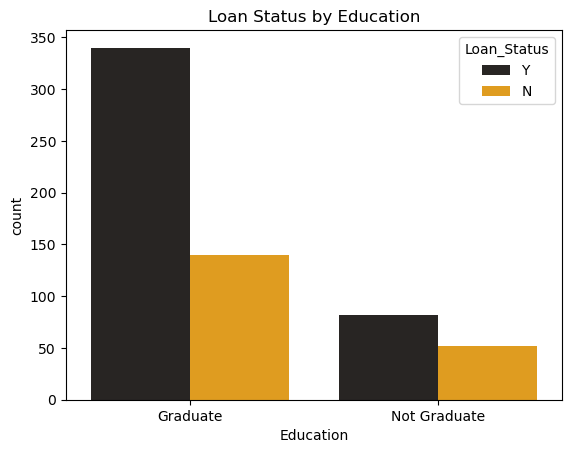

In [14]:
# Viaualisation on Education and Loan_status 
sns.countplot(data=train_df, x='Education', hue='Loan_Status',color='orange')
plt.title("Loan Status by Education")
plt.show()

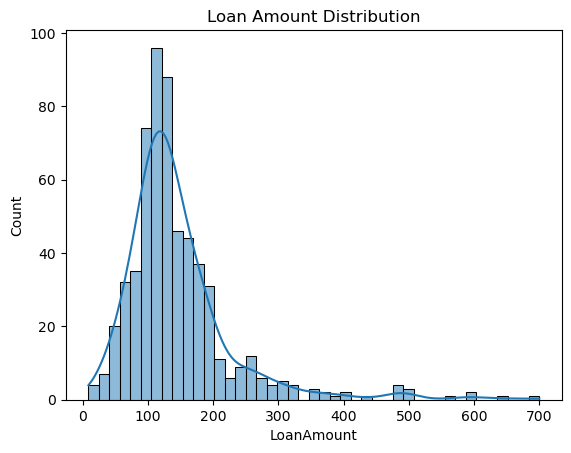

In [15]:
# Visualisation on Loan_amount Distribution
sns.histplot(train_df['LoanAmount'].dropna(), kde=True)
plt.title("Loan Amount Distribution")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_7696\4200616541.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.countplot(data=train_df, x='Credit_History', hue='Loan_Status',color='red')


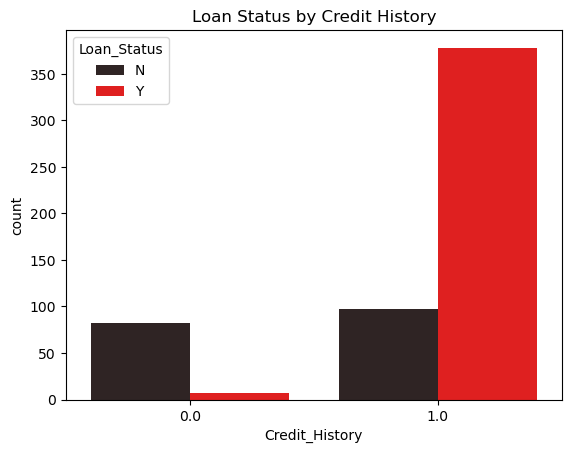

In [16]:
# Visualization on Loan_Staus vs Credit_History
sns.countplot(data=train_df, x='Credit_History', hue='Loan_Status',color='red')
plt.title("Loan Status by Credit History")
plt.show()

In [17]:
# Data cleaning and preprocessing 

In [18]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
# Fill missing categorical values with mode
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])

# Fill missing numerical values with median
for col in ['LoanAmount', 'Loan_Amount_Term']:
    train_df[col] = train_df[col].fillna(train_df[col].median())

In [20]:
train_df.isnull().sum() # Re_ checking for missing values Solved

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [21]:
# Map target variable
train_df['Loan_Status'] = train_df['Loan_Status'].map({'Y': 1, 'N': 0})

# Replace '3+' with 3 and convert to int
train_df['Dependents'] = train_df['Dependents'].replace('3+', 3)
train_df['Dependents'] = train_df['Dependents'].astype(int)

# One-hot encoding of categorical columns
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
train_df = pd.get_dummies(train_df, columns=categorical_cols, drop_first=True)


In [22]:
# Dropping irrevelant columns that isnt modeling (eg. Loan_ID)
train_df.drop(columns=['Loan_ID'], inplace=True)

In [23]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns for scaling
numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

scaler = StandardScaler()
train_df[numeric_cols] = scaler.fit_transform(train_df[numeric_cols])


In [24]:
# Features (X) and Target (y)
X = train_df.drop(columns=['Loan_Status'])
y = train_df['Loan_Status']

In [25]:
from sklearn.model_selection import train_test_split
# 80% training , 20% testing
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.linear_model import LogisticRegression

# Initialize and train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [28]:
# Predict on test set
y_pred = model.predict(X_val)

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_val, y_pred))


Accuracy: 0.7886178861788617
Confusion Matrix:
 [[18 25]
 [ 1 79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [31]:
# Training with RandomForest Model
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
# Predict on test data
rf_pred = rf_model.predict(X_val)

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
rf_accuracy = accuracy_score(y_val, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

# Confusion Matrix
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_val, rf_pred))

# Classification Report
print("Random Forest Classification Report:\n", classification_report(y_val, rf_pred))

Random Forest Accuracy: 0.7723577235772358
Random Forest Confusion Matrix:
 [[18 25]
 [ 3 77]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.42      0.56        43
           1       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123



In [35]:
# Training on XGBoot Model
from xgboost import XGBClassifier

# Initialize the model
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [37]:
# Predict on test data
xgb_pred = xgb_model.predict(X_val)

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
xgb_accuracy = accuracy_score(y_val, xgb_pred)
print("XGBoost Accuracy:", xgb_accuracy)

# Confusion Matrix
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_val, xgb_pred))

# Classification Report
print("XGBoost Classification Report:\n", classification_report(y_val, xgb_pred))

XGBoost Accuracy: 0.7235772357723578
XGBoost Confusion Matrix:
 [[19 24]
 [10 70]]
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.44      0.53        43
           1       0.74      0.88      0.80        80

    accuracy                           0.72       123
   macro avg       0.70      0.66      0.67       123
weighted avg       0.71      0.72      0.71       123



In [40]:
#Comparing each of the models all together
from sklearn.metrics import accuracy_score

# Accuracy scores
log_accuracy = accuracy_score(y_val, y_pred)
rf_accuracy = accuracy_score(y_val, rf_pred)
xgb_accuracy = accuracy_score(y_val, xgb_pred)

# Combine in dictionary
model_accuracies = {
    'Logistic Regression': log_accuracy,
    'Random Forest': rf_accuracy,
    'XGBoost': xgb_accuracy
}

# Display
for model, acc in model_accuracies.items():
    print(f"{model}: {acc:.4f}")


Logistic Regression: 0.7886
Random Forest: 0.7724
XGBoost: 0.7236


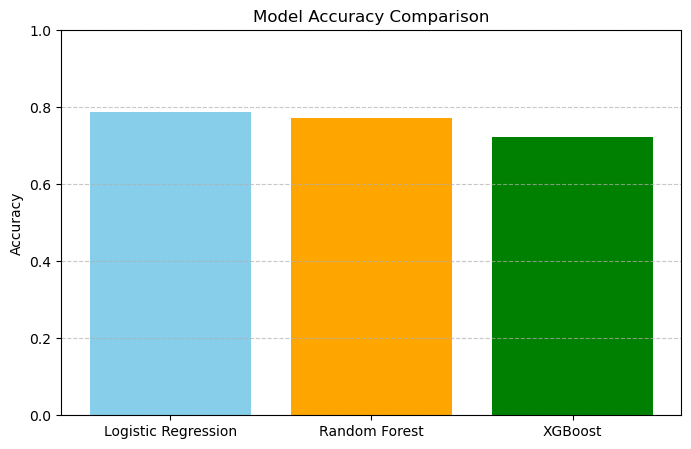

In [41]:
# Visualisation on the models
import matplotlib.pyplot as plt

# Bar chart of accuracies
plt.figure(figsize=(8, 5))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['skyblue', 'orange', 'green'])
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

log_model = LogisticRegression(max_iter=1000, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_model(model, X, y, X_val, y_val):
    # Cross-validation (using 5 folds)
    cv_score = cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()
    
    # Fit and predict
    model.fit(X, y)
    y_pred = model.predict(X_val)
    
    # Compute metrics
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    
    return cv_score, precision, recall, f1


In [46]:
models = {
    "Logistic Regression": log_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

results = {}

for name, model in models.items():
    cv, precision, recall, f1 = evaluate_model(model, X_train, y_train, X_val, y_val)
    results[name] = {
        "CV Accuracy": cv,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# Display results
import pandas as pd
metrics_df = pd.DataFrame(results).T
print(metrics_df)


                     CV Accuracy  Precision  Recall  F1 Score
Logistic Regression     0.810513   0.759615  0.9875  0.858696
Random Forest           0.790167   0.754902  0.9625  0.846154
XGBoost                 0.757555   0.744681  0.8750  0.804598


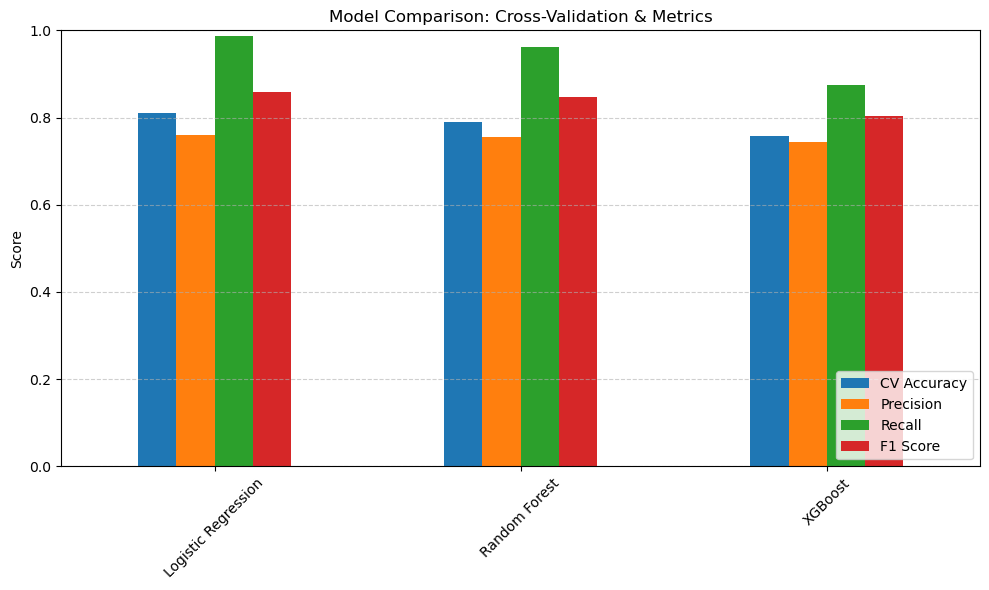

In [47]:
# Plotting the metrics
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title("Model Comparison: Cross-Validation & Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [48]:
# Robust Evaluation with  Cross _ Validation ( All-Mertics)
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [49]:
# Defining the scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

In [50]:
# Runing 5_ fold Cross_Validation for all Models 
cv_results = {}

for name, model in models.items():
    scores = cross_validate(model, X_train, y_train, cv=5, scoring=scoring)
    cv_results[name] = {
        "Accuracy": scores['test_accuracy'].mean(),
        "Precision": scores['test_precision'].mean(),
        "Recall": scores['test_recall'].mean(),
        "F1 Score": scores['test_f1'].mean()
    }

# Convert to DataFrame
cv_df = pd.DataFrame(cv_results).T
print(cv_df)

                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.810513   0.798960  0.973615  0.877478
Random Forest        0.790167   0.802756  0.926854  0.859801
XGBoost              0.757555   0.797145  0.874041  0.833451


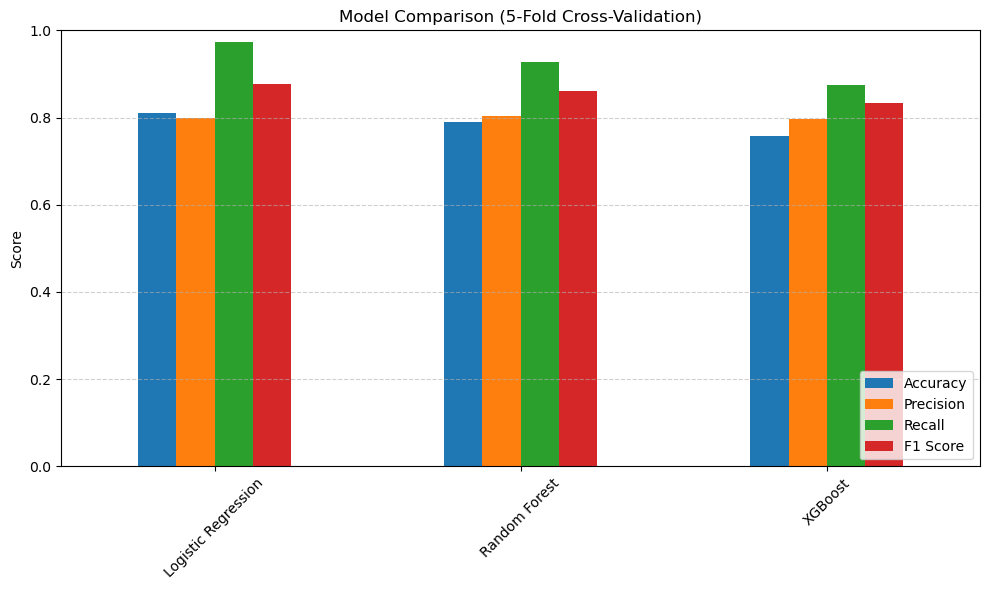

In [51]:
# Visualisation 
cv_df.plot(kind='bar', figsize=(10, 6))
plt.title("Model Comparison (5-Fold Cross-Validation)")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


In [ ]:
# BEST MODEL IS Logistic Regression 
#Evaluate Logistic regression on  confusion matrics, ROC CURVE  

In [53]:
# Retaining logistic regression on Full training 
from sklearn.linear_model import LogisticRegression

# Retrain the best model
best_model = LogisticRegression(max_iter=1000, random_state=42)
best_model.fit(X_train, y_train)

# Predict on test data
y_pred = best_model.predict(X_val)
y_proba = best_model.predict_proba(X_val)[:, 1]

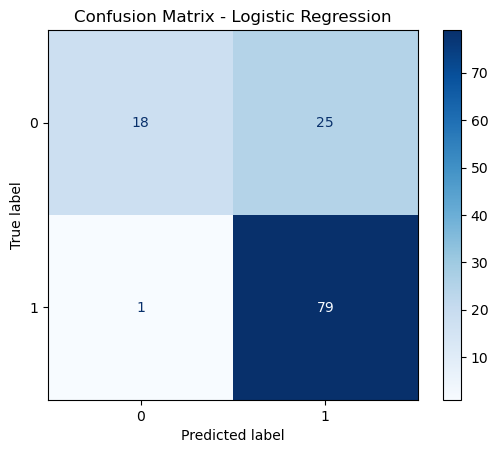

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


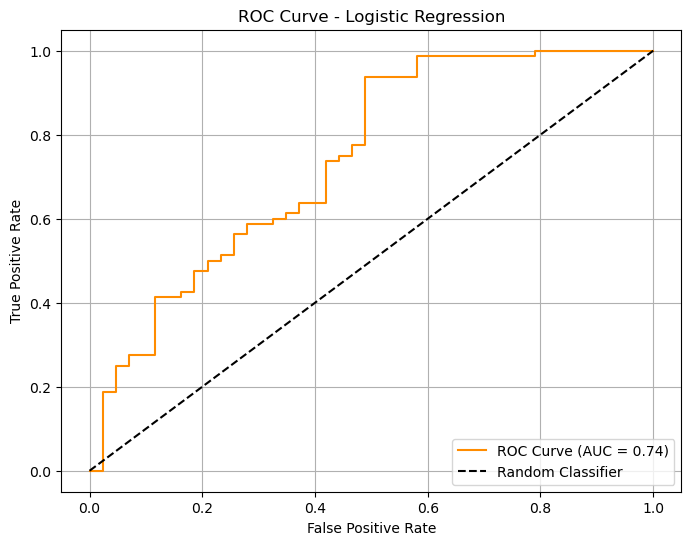

In [57]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_val, y_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [59]:
# Saving the model
import pickle
from sklearn.linear_model import LogisticRegression

# Retrain Logistic Regression
best_model = LogisticRegression(max_iter=1000, random_state=42)
best_model.fit(X_train, y_train)

# Save the model to .pkl file
model_filename = 'logistic_regression_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_model, file)

print("Model saved as:", model_filename)


Model saved as: logistic_regression_model.pkl
